In [1]:
# essentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# utilities
import codecs
import logging
import time
import tqdm

# visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# serialization
import pickle

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 30)

Load results:

In [3]:
result_1 = pickle.load(open("eval_results/result_1.p", "rb"))
result_2 = pickle.load(open("eval_results/result_2.p", "rb"))
result_3 = pickle.load(open("eval_results/result_3.p", "rb"))
result_4 = pickle.load(open("eval_results/result_4.p", "rb"))
result_5 = pickle.load(open("eval_results/result_5.p", "rb"))

In [4]:
scores_1 = result_1.mean(axis=0, level=['top-n', 'model'])
scores_2 = result_2.mean(axis=0, level=['top-n', 'model'])
scores_3 = result_3.mean(axis=0, level=['top-n', 'model'])
scores_4 = result_4.mean(axis=0, level=['top-n', 'model'])
scores_5 = result_5.mean(axis=0, level=['top-n', 'model'])

### F1 score function
*F1 = 2 * (precision * recall) / (precision + recall)*

In [5]:
def f1_score(precision_series, recall_series):
    product = precision_series.multiply(recall_series).multiply(2)
    suma = precision_series.add(recall_series)
    return product / suma

## Analysis of first results

Results:

In [6]:
precisions_1 = scores_1.xs('precision', level='metric', axis=1).unstack('model')
precisions_1

type                                                 relevance  \
model ALS_rank-100_regularization-0.01_alpha-100_num_epochs-15   
top-n                                                            
5                                               0.002780         
10                                              0.002198         
20                                              0.001637         

type                                                            \
model ALS_rank-100_regularization-0.01_alpha-100_num_epochs-30   
top-n                                                            
5                                               0.003280         
10                                              0.002572         
20                                              0.001981         

type                                                            \
model ALS_rank-100_regularization-0.01_alpha-100_num_epochs-40   
top-n                                                            
5                                               0.003375         
10                                              0.002698         
20                                              0.002073         

type                                                          \
model ALS_rank-100_regularization-0.01_alpha-1_num_epochs-15   
top-n                                                          
5                                               0.002814       
10                                              0.002330       
20                                              0.001833       

type                                                          \
model ALS_rank-100_regularization-0.01_alpha-1_num_epochs-30   
top-n                                                          
5                                               0.002898       
10                                              0.002398       
20                                              0.001903       

type                                                          \
model ALS_rank-100_regularization-0.01_alpha-1_num_epochs-40   
top-n                                                          
5                                               0.002958       
10                                              0.002422       
20                                              0.001900       

type                                                           \
model ALS_rank-100_regularization-0.01_alpha-50_num_epochs-15   
top-n                                                           
5                                               0.003239        
10                                              0.002531        
20                                              0.001915        

type                                                           \
model ALS_rank-100_regularization-0.01_alpha-50_num_epochs-30   
top-n                                                           
5                                               0.003386        
10                                              0.002807        
20                                              0.002172        

type                                                           \
model ALS_rank-100_regularization-0.01_alpha-50_num_epochs-40   
top-n                                                           
5                                               0.003656        
10                                              0.002915        
20                                              0.002229        

type                                                           \
model ALS_rank-100_regularization-0.1_alpha-100_num_epochs-15   
top-n                                                           
5                                               0.002614        
10                                              0.002083        
20                                              0.001583        

type                                                           \
model ALS_rank-100_regula

In [7]:
recalls_1 = scores_1.xs('recall', level='metric', axis=1).unstack('model')
recalls_1

type                                                 relevance  \
model ALS_rank-100_regularization-0.01_alpha-100_num_epochs-15   
top-n                                                            
5                                               0.004633         
10                                              0.007326         
20                                              0.010914         

type                                                            \
model ALS_rank-100_regularization-0.01_alpha-100_num_epochs-30   
top-n                                                            
5                                               0.005467         
10                                              0.008574         
20                                              0.013206         

type                                                            \
model ALS_rank-100_regularization-0.01_alpha-100_num_epochs-40   
top-n                                                            
5                                               0.005626         
10                                              0.008992         
20                                              0.013819         

type                                                          \
model ALS_rank-100_regularization-0.01_alpha-1_num_epochs-15   
top-n                                                          
5                                               0.004690       
10                                              0.007767       
20                                              0.012220       

type                                                          \
model ALS_rank-100_regularization-0.01_alpha-1_num_epochs-30   
top-n                                                          
5                                               0.004829       
10                                              0.007994       
20                                              0.012687       

type                                                          \
model ALS_rank-100_regularization-0.01_alpha-1_num_epochs-40   
top-n                                                          
5                                               0.004930       
10                                              0.008072       
20                                              0.012664       

type                                                           \
model ALS_rank-100_regularization-0.01_alpha-50_num_epochs-15   
top-n                                                           
5                                               0.005399        
10                                              0.008437        
20                                              0.012767        

type                                                           \
model ALS_rank-100_regularization-0.01_alpha-50_num_epochs-30   
top-n                                                           
5                                               0.005644        
10                                              0.009358        
20                                              0.014482        

type                                                           \
model ALS_rank-100_regularization-0.01_alpha-50_num_epochs-40   
top-n                                                           
5                                               0.006093        
10                                              0.009716        
20                                              0.014863        

type                                                           \
model ALS_rank-100_regularization-0.1_alpha-100_num_epochs-15   
top-n                                                           
5                                               0.004357        
10                                              0.006945        
20                                              0.010553        

type                                                           \
model ALS_rank-100_regula

In [8]:
f1_scores_1 = f1_score(precisions_1, recalls_1)
f1_scores_1

type                                                 relevance  \
model ALS_rank-100_regularization-0.01_alpha-100_num_epochs-15   
top-n                                                            
5                                               0.003474         
10                                              0.003381         
20                                              0.002847         

type                                                            \
model ALS_rank-100_regularization-0.01_alpha-100_num_epochs-30   
top-n                                                            
5                                               0.004101         
10                                              0.003957         
20                                              0.003445         

type                                                            \
model ALS_rank-100_regularization-0.01_alpha-100_num_epochs-40   
top-n                                                            
5                                               0.004219         
10                                              0.004150         
20                                              0.003605         

type                                                          \
model ALS_rank-100_regularization-0.01_alpha-1_num_epochs-15   
top-n                                                          
5                                               0.003518       
10                                              0.003585       
20                                              0.003188       

type                                                          \
model ALS_rank-100_regularization-0.01_alpha-1_num_epochs-30   
top-n                                                          
5                                               0.003622       
10                                              0.003690       
20                                              0.003310       

type                                                          \
model ALS_rank-100_regularization-0.01_alpha-1_num_epochs-40   
top-n                                                          
5                                               0.003698       
10                                              0.003726       
20                                              0.003304       

type                                                           \
model ALS_rank-100_regularization-0.01_alpha-50_num_epochs-15   
top-n                                                           
5                                               0.004049        
10                                              0.003894        
20                                              0.003331        

type                                                           \
model ALS_rank-100_regularization-0.01_alpha-50_num_epochs-30   
top-n                                                           
5                                               0.004233        
10                                              0.004319        
20                                              0.003778        

type                                                           \
model ALS_rank-100_regularization-0.01_alpha-50_num_epochs-40   
top-n                                                           
5                                               0.004570        
10                                              0.004484        
20                                              0.003877        

type                                                           \
model ALS_rank-100_regularization-0.1_alpha-100_num_epochs-15   
top-n                                                           
5                                               0.003268        
10                                              0.003205        
20                                              0.002753        

type                                                           \
model ALS_rank-100_regula

In [9]:
#precisions_1.iloc[precisions_1.index.get_level_values('top-n') == 5]

Max precision values:

In [10]:
print(precisions_1.idxmax(axis=1)[5])
print(precisions_1.iloc[precisions_1.index.get_level_values('top-n') == 5].max(axis=1))

('relevance', 'ALS_rank-100_regularization-0.01_alpha-50_num_epochs-40')
top-n
5    0.003656
dtype: float64


In [11]:
print(precisions_1.idxmax(axis=1)[10])
print(precisions_1.iloc[precisions_1.index.get_level_values('top-n') == 10].max(axis=1))

('relevance', 'ALS_rank-100_regularization-0.01_alpha-50_num_epochs-40')
top-n
10    0.002915
dtype: float64


In [12]:
print(precisions_1.idxmax(axis=1)[20])
print(precisions_1.iloc[precisions_1.index.get_level_values('top-n') == 20].max(axis=1))

('relevance', 'ALS_rank-100_regularization-0.01_alpha-50_num_epochs-40')
top-n
20    0.002229
dtype: float64


Max F1 score:

In [13]:
print(f1_scores_1.idxmax(axis=1)[5])
print(f1_scores_1.iloc[f1_scores_1.index.get_level_values('top-n') == 5].max(axis=1))

('relevance', 'ALS_rank-100_regularization-0.01_alpha-50_num_epochs-40')
top-n
5    0.00457
dtype: float64


## Analysis of second results

Results:

In [14]:
precisions_2 = scores_2.xs('precision', level='metric', axis=1).unstack('model')
precisions_2

type                             relevance  \
model ALS_rank-100_alpha-100_num_epochs-40   
top-n                                        
5                                 0.003394   
10                                0.002673   
20                                0.002069   

type                                        \
model ALS_rank-100_alpha-100_num_epochs-50   
top-n                                        
5                                 0.003351   
10                                0.002717   
20                                0.002095   

type                                        \
model ALS_rank-100_alpha-100_num_epochs-60   
top-n                                        
5                                 0.003400   
10                                0.002771   
20                                0.002114   

type                                        \
model ALS_rank-150_alpha-100_num_epochs-40   
top-n                                        
5                                 0.004386   
10                                0.003450   
20                                0.002522   

type                                        \
model ALS_rank-150_alpha-100_num_epochs-50   
top-n                                        
5                                 0.004430   
10                                0.003500   
20                                0.002601   

type                                        \
model ALS_rank-150_alpha-100_num_epochs-60   
top-n                                        
5                                 0.004364   
10                                0.003462   
20                                0.002645   

type                                        \
model ALS_rank-200_alpha-100_num_epochs-40   
top-n                                        
5                                 0.004997   
10                                0.003854   
20                                0.002864   

type                                        \
model ALS_rank-200_alpha-100_num_epochs-50   
top-n                                        
5                                 0.005050   
10                                0.003956   
20                                0.002932   

type                                                                      
model ALS_rank-200_alpha-100_num_epochs-60        MP   PureSVD       RND  
top-n                                                                     
5                                 0.005075  0.001156  0.001158  0.000012  
10                                0.003982  0.000841  0.000883  0.000012  
20                                0.002971  0.000909  0.000648  0.000011

In [15]:
recalls_2 = scores_2.xs('recall', level='metric', axis=1).unstack('model')
recalls_2

type                             relevance  \
model ALS_rank-100_alpha-100_num_epochs-40   
top-n                                        
5                                 0.005656   
10                                0.008909   
20                                0.013794   

type                                        \
model ALS_rank-100_alpha-100_num_epochs-50   
top-n                                        
5                                 0.005585   
10                                0.009058   
20                                0.013965   

type                                        \
model ALS_rank-100_alpha-100_num_epochs-60   
top-n                                        
5                                 0.005666   
10                                0.009237   
20                                0.014091   

type                                        \
model ALS_rank-150_alpha-100_num_epochs-40   
top-n                                        
5                                 0.007310   
10                                0.011501   
20                                0.016815   

type                                        \
model ALS_rank-150_alpha-100_num_epochs-50   
top-n                                        
5                                 0.007384   
10                                0.011665   
20                                0.017339   

type                                        \
model ALS_rank-150_alpha-100_num_epochs-60   
top-n                                        
5                                 0.007273   
10                                0.011539   
20                                0.017636   

type                                        \
model ALS_rank-200_alpha-100_num_epochs-40   
top-n                                        
5                                 0.008329   
10                                0.012848   
20                                0.019091   

type                                        \
model ALS_rank-200_alpha-100_num_epochs-50   
top-n                                        
5                                 0.008417   
10                                0.013186   
20                                0.019545   

type                                                                      
model ALS_rank-200_alpha-100_num_epochs-60        MP   PureSVD       RND  
top-n                                                                     
5                                 0.008458  0.001927  0.001929  0.000020  
10                                0.013274  0.002804  0.002943  0.000040  
20                                0.019808  0.006063  0.004323  0.000076

In [16]:
f1_scores_2 = f1_score(precisions_2, recalls_2)
f1_scores_2

type                             relevance  \
model ALS_rank-100_alpha-100_num_epochs-40   
top-n                                        
5                                 0.004242   
10                                0.004112   
20                                0.003598   

type                                        \
model ALS_rank-100_alpha-100_num_epochs-50   
top-n                                        
5                                 0.004189   
10                                0.004180   
20                                0.003643   

type                                        \
model ALS_rank-100_alpha-100_num_epochs-60   
top-n                                        
5                                 0.004250   
10                                0.004263   
20                                0.003676   

type                                        \
model ALS_rank-150_alpha-100_num_epochs-40   
top-n                                        
5                                 0.005483   
10                                0.005308   
20                                0.004386   

type                                        \
model ALS_rank-150_alpha-100_num_epochs-50   
top-n                                        
5                                 0.005538   
10                                0.005384   
20                                0.004523   

type                                        \
model ALS_rank-150_alpha-100_num_epochs-60   
top-n                                        
5                                 0.005455   
10                                0.005326   
20                                0.004601   

type                                        \
model ALS_rank-200_alpha-100_num_epochs-40   
top-n                                        
5                                 0.006247   
10                                0.005930   
20                                0.004980   

type                                        \
model ALS_rank-200_alpha-100_num_epochs-50   
top-n                                        
5                                 0.006313   
10                                0.006086   
20                                0.005099   

type                                                                      
model ALS_rank-200_alpha-100_num_epochs-60        MP   PureSVD       RND  
top-n                                                                     
5                                 0.006343  0.001445  0.001447  0.000015  
10                                0.006127  0.001294  0.001358  0.000019  
20                                0.005167  0.001582  0.001128  0.000020

Max precision values:

In [17]:
print(precisions_2.idxmax(axis=1)[5])
print(precisions_2.iloc[precisions_2.index.get_level_values('top-n') == 5].max(axis=1))

('relevance', 'ALS_rank-200_alpha-100_num_epochs-60')
top-n
5    0.005075
dtype: float64


In [18]:
print(precisions_2.idxmax(axis=1)[10])
print(precisions_2.iloc[precisions_2.index.get_level_values('top-n') == 10].max(axis=1))

('relevance', 'ALS_rank-200_alpha-100_num_epochs-60')
top-n
10    0.003982
dtype: float64


In [19]:
print(precisions_2.idxmax(axis=1)[20])
print(precisions_2.iloc[precisions_2.index.get_level_values('top-n') == 20].max(axis=1))

('relevance', 'ALS_rank-200_alpha-100_num_epochs-60')
top-n
20    0.002971
dtype: float64


Max F1 score:

In [20]:
print(f1_scores_2.idxmax(axis=1)[5])
print(f1_scores_2.iloc[f1_scores_2.index.get_level_values('top-n') == 5].max(axis=1))

('relevance', 'ALS_rank-200_alpha-100_num_epochs-60')
top-n
5    0.006343
dtype: float64


### Alpha curve

In [21]:
alpha_diff_scores_rank_100 = scores_1.iloc[
    scores_1.index.get_level_values('model').isin(['ALS_rank-100_regularization-0.01_alpha-1_num_epochs-40',
                                                   'ALS_rank-100_regularization-0.01_alpha-50_num_epochs-40',
                                                   'ALS_rank-100_regularization-0.01_alpha-100_num_epochs-40'])
].xs('precision', level='metric', axis=1).unstack('model')

alpha_5_precisions_rank_100 = alpha_diff_scores_rank_100.iloc[alpha_diff_scores_rank_100.index.get_level_values('top-n') == 5].values.flatten()
alpha_10_precisions_rank_100 = alpha_diff_scores_rank_100.iloc[alpha_diff_scores_rank_100.index.get_level_values('top-n') == 10].values.flatten()
alpha_20_precisions_rank_100 = alpha_diff_scores_rank_100.iloc[alpha_diff_scores_rank_100.index.get_level_values('top-n') == 20].values.flatten()

alpha_diff_scores_rank_50 = scores_1.iloc[
    scores_1.index.get_level_values('model').isin(['ALS_rank-50_regularization-0.01_alpha-1_num_epochs-40',
                                                   'ALS_rank-50_regularization-0.01_alpha-50_num_epochs-40',
                                                   'ALS_rank-50_regularization-0.01_alpha-100_num_epochs-40'])
].xs('precision', level='metric', axis=1).unstack('model')

alpha_5_precisions_rank_50 = alpha_diff_scores_rank_50.iloc[alpha_diff_scores_rank_50.index.get_level_values('top-n') == 5].values.flatten()
alpha_10_precisions_rank_50 = alpha_diff_scores_rank_50.iloc[alpha_diff_scores_rank_50.index.get_level_values('top-n') == 10].values.flatten()
alpha_20_precisions_rank_50 = alpha_diff_scores_rank_50.iloc[alpha_diff_scores_rank_50.index.get_level_values('top-n') == 20].values.flatten()


alpha_diff_values = [1, 50, 100]

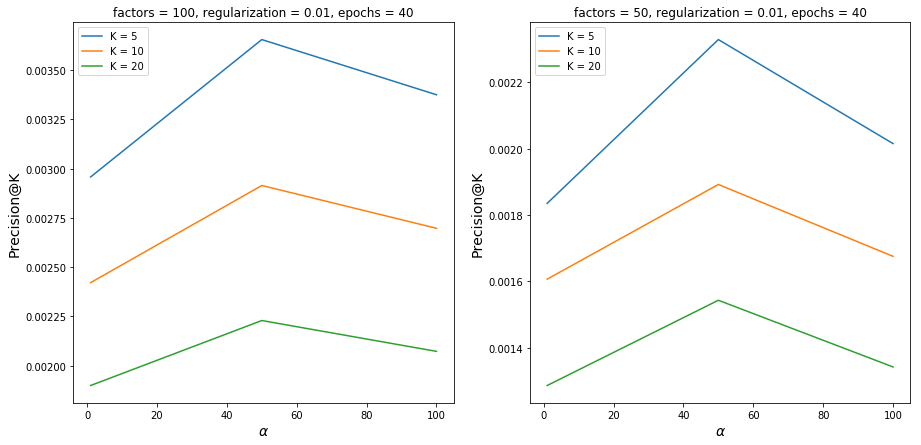

In [22]:
plt.figure(figsize=(15, 7))

plt.subplot(121)
plt.title('factors = 100, regularization = 0.01, epochs = 40')
plt.xlabel(r'$\alpha$', fontsize=14)
plt.ylabel('Precision@K', fontsize=14)
plt.plot(alpha_diff_values, alpha_5_precisions_rank_100)
plt.plot(alpha_diff_values, alpha_10_precisions_rank_100)
plt.plot(alpha_diff_values, alpha_20_precisions_rank_100)
plt.legend(['K = 5', 'K = 10', 'K = 20'], loc='upper left')

plt.subplot(122)
plt.title('factors = 50, regularization = 0.01, epochs = 40')
plt.xlabel(r'$\alpha$', fontsize=14)
plt.ylabel('Precision@K', fontsize=14)
plt.plot(alpha_diff_values, alpha_5_precisions_rank_50)
plt.plot(alpha_diff_values, alpha_10_precisions_rank_50)
plt.plot(alpha_diff_values, alpha_20_precisions_rank_50)
plt.legend(['K = 5', 'K = 10', 'K = 20'], loc='upper left')

plt.show()

### Regularization curve

In [23]:
reg_diff_scores_rank_100 = scores_1.iloc[
    scores_1.index.get_level_values('model').isin(['ALS_rank-100_regularization-0.01_alpha-50_num_epochs-40',
                                                   'ALS_rank-100_regularization-0.1_alpha-50_num_epochs-40',
                                                   'ALS_rank-100_regularization-1_alpha-50_num_epochs-40'])
].xs('precision', level='metric', axis=1).unstack('model')

reg_5_precisions_rank_100 = reg_diff_scores_rank_100.iloc[reg_diff_scores_rank_100.index.get_level_values('top-n') == 5].values.flatten()
reg_10_precisions_rank_100 = reg_diff_scores_rank_100.iloc[reg_diff_scores_rank_100.index.get_level_values('top-n') == 10].values.flatten()
reg_20_precisions_rank_100 = reg_diff_scores_rank_100.iloc[reg_diff_scores_rank_100.index.get_level_values('top-n') == 20].values.flatten()

reg_diff_scores_rank_50 = scores_1.iloc[
    scores_1.index.get_level_values('model').isin(['ALS_rank-50_regularization-0.01_alpha-50_num_epochs-40',
                                                   'ALS_rank-50_regularization-0.1_alpha-50_num_epochs-40',
                                                   'ALS_rank-50_regularization-1_alpha-50_num_epochs-40'])
].xs('precision', level='metric', axis=1).unstack('model')

reg_5_precisions_rank_50 = reg_diff_scores_rank_50.iloc[reg_diff_scores_rank_50.index.get_level_values('top-n') == 5].values.flatten()
reg_10_precisions_rank_50 = reg_diff_scores_rank_50.iloc[reg_diff_scores_rank_50.index.get_level_values('top-n') == 10].values.flatten()
reg_20_precisions_rank_50 = reg_diff_scores_rank_50.iloc[reg_diff_scores_rank_50.index.get_level_values('top-n') == 20].values.flatten()


reg_diff_values = [0.01, 0.1, 1]

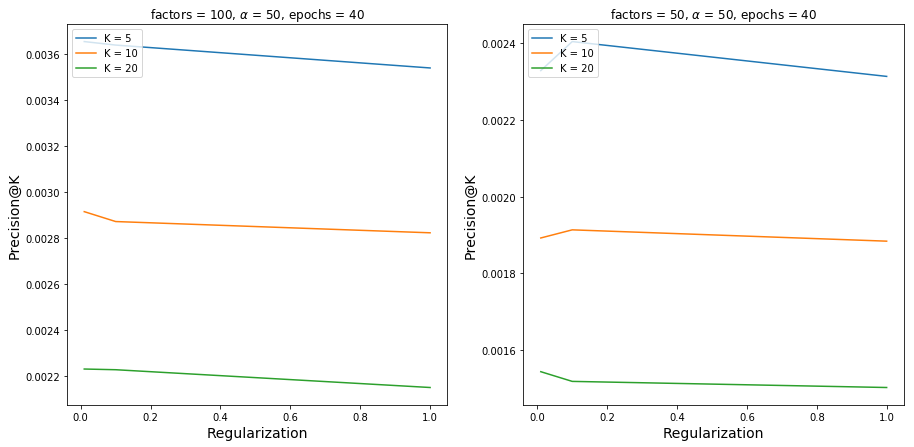

In [24]:
plt.figure(figsize=(15, 7))

plt.subplot(121)
plt.title(r'factors = 100, $\alpha$ = 50, epochs = 40')
plt.xlabel('Regularization', fontsize=14)
plt.ylabel('Precision@K', fontsize=14)
plt.plot(reg_diff_values, reg_5_precisions_rank_100)
plt.plot(reg_diff_values, reg_10_precisions_rank_100)
plt.plot(reg_diff_values, reg_20_precisions_rank_100)
plt.legend(['K = 5', 'K = 10', 'K = 20'], loc='upper left')

plt.subplot(122)
plt.title(r'factors = 50, $\alpha$ = 50, epochs = 40')
plt.xlabel('Regularization', fontsize=14)
plt.ylabel('Precision@K', fontsize=14)
plt.plot(reg_diff_values, reg_5_precisions_rank_50)
plt.plot(reg_diff_values, reg_10_precisions_rank_50)
plt.plot(reg_diff_values, reg_20_precisions_rank_50)
plt.legend(['K = 5', 'K = 10', 'K = 20'], loc='upper left')

plt.show()

As can be seen, regularization factor has no significant impact on the results.

SVD with more (200) factors shows little progress:

In [25]:
precisions_3 = scores_3.xs('precision', level='metric', axis=1).unstack('model')
precisions_3

type                                                 relevance            \
model ALS_rank-200_regularization-0.01_alpha-100_num_epochs-60        MP   
top-n                                                                      
5                                               0.005112        0.001156   
10                                              0.003963        0.000841   
20                                              0.002957        0.000909   

type                       
model   PureSVD       RND  
top-n                      
5      0.001672  0.000008  
10     0.001372  0.000011  
20     0.001019  0.000011

In [26]:
print(precisions_3.idxmax(axis=1)[5])
print(precisions_3.iloc[precisions_3.index.get_level_values('top-n') == 5].max(axis=1))

('relevance', 'ALS_rank-200_regularization-0.01_alpha-100_num_epochs-60')
top-n
5    0.005112
dtype: float64


More fine-grained parameter grid search on number of epochs and number of latent factors:

In [27]:
precisions_4 = scores_4.xs('precision', level='metric', axis=1).unstack('model')
precisions_4

type                                                 relevance  \
model ALS_rank-100_regularization-0.01_alpha-50_num_epochs-100   
top-n                                                            
5                                               0.003645         
10                                              0.002961         
20                                              0.002269         

type                                                           \
model ALS_rank-100_regularization-0.01_alpha-50_num_epochs-40   
top-n                                                           
5                                               0.003564        
10                                              0.002883        
20                                              0.002260        

type                                                           \
model ALS_rank-100_regularization-0.01_alpha-50_num_epochs-60   
top-n                                                           
5                                               0.003596        
10                                              0.002909        
20                                              0.002256        

type                                                           \
model ALS_rank-100_regularization-0.01_alpha-50_num_epochs-80   
top-n                                                           
5                                               0.003522        
10                                              0.002914        
20                                              0.002258        

type                                                            \
model ALS_rank-150_regularization-0.01_alpha-50_num_epochs-100   
top-n                                                            
5                                               0.004675         
10                                              0.003611         
20                                              0.002767         

type                                                           \
model ALS_rank-150_regularization-0.01_alpha-50_num_epochs-40   
top-n                                                           
5                                               0.004472        
10                                              0.003546        
20                                              0.002712        

type                                                           \
model ALS_rank-150_regularization-0.01_alpha-50_num_epochs-60   
top-n                                                           
5                                               0.004603        
10                                              0.003653        
20                                              0.002733        

type                                                           \
model ALS_rank-150_regularization-0.01_alpha-50_num_epochs-80   
top-n                                                           
5                                               0.004566        
10                                              0.003562        
20                                              0.002723        

type                                                            \
model ALS_rank-200_regularization-0.01_alpha-50_num_epochs-100   
top-n                                                            
5                                               0.005176         
10                                              0.004014         
20                                              0.003005         

type                                                           \
model ALS_rank-200_regularization-0.01_alpha-50_num_epochs-40   
top-n                                                           
5                                               0.005156        
10                                              0.004056        
20                                              0.003042        

type                                                           \
model A

Visualization of different precision values depending on number of epochs:

In [5]:
epochs_diff_scores_rank_100 = scores_4.iloc[
    scores_4.index.get_level_values('model').isin(['ALS_rank-100_regularization-0.01_alpha-50_num_epochs-40',
                                                   'ALS_rank-100_regularization-0.01_alpha-50_num_epochs-60',
                                                   'ALS_rank-100_regularization-0.01_alpha-50_num_epochs-80',
                                                   'ALS_rank-100_regularization-0.01_alpha-50_num_epochs-100'])
].xs('precision', level='metric', axis=1).unstack('model')

epochs_5_precisions_rank_100 = epochs_diff_scores_rank_100.iloc[epochs_diff_scores_rank_100.index.get_level_values('top-n') == 5].values.flatten()
epochs_10_precisions_rank_100 = epochs_diff_scores_rank_100.iloc[epochs_diff_scores_rank_100.index.get_level_values('top-n') == 10].values.flatten()
epochs_20_precisions_rank_100 = epochs_diff_scores_rank_100.iloc[epochs_diff_scores_rank_100.index.get_level_values('top-n') == 20].values.flatten()

epochs_diff_scores_rank_150 = scores_4.iloc[
    scores_4.index.get_level_values('model').isin(['ALS_rank-150_regularization-0.01_alpha-50_num_epochs-40',
                                                   'ALS_rank-150_regularization-0.01_alpha-50_num_epochs-60',
                                                   'ALS_rank-150_regularization-0.01_alpha-50_num_epochs-80',
                                                   'ALS_rank-150_regularization-0.01_alpha-50_num_epochs-100'])
].xs('precision', level='metric', axis=1).unstack('model')

epochs_5_precisions_rank_150 = epochs_diff_scores_rank_150.iloc[epochs_diff_scores_rank_150.index.get_level_values('top-n') == 5].values.flatten()
epochs_10_precisions_rank_150 = epochs_diff_scores_rank_150.iloc[epochs_diff_scores_rank_150.index.get_level_values('top-n') == 10].values.flatten()
epochs_20_precisions_rank_150 = epochs_diff_scores_rank_150.iloc[epochs_diff_scores_rank_150.index.get_level_values('top-n') == 20].values.flatten()

epochs_diff_scores_rank_200 = scores_4.iloc[
    scores_4.index.get_level_values('model').isin(['ALS_rank-200_regularization-0.01_alpha-50_num_epochs-40',
                                                   'ALS_rank-200_regularization-0.01_alpha-50_num_epochs-60',
                                                   'ALS_rank-200_regularization-0.01_alpha-50_num_epochs-80',
                                                   'ALS_rank-200_regularization-0.01_alpha-50_num_epochs-100'])
].xs('precision', level='metric', axis=1).unstack('model')

epochs_5_precisions_rank_200 = epochs_diff_scores_rank_200.iloc[epochs_diff_scores_rank_200.index.get_level_values('top-n') == 5].values.flatten()
epochs_10_precisions_rank_200 = epochs_diff_scores_rank_200.iloc[epochs_diff_scores_rank_200.index.get_level_values('top-n') == 10].values.flatten()
epochs_20_precisions_rank_200 = epochs_diff_scores_rank_200.iloc[epochs_diff_scores_rank_200.index.get_level_values('top-n') == 20].values.flatten()

epochs_diff_values = [40, 60, 80, 100]

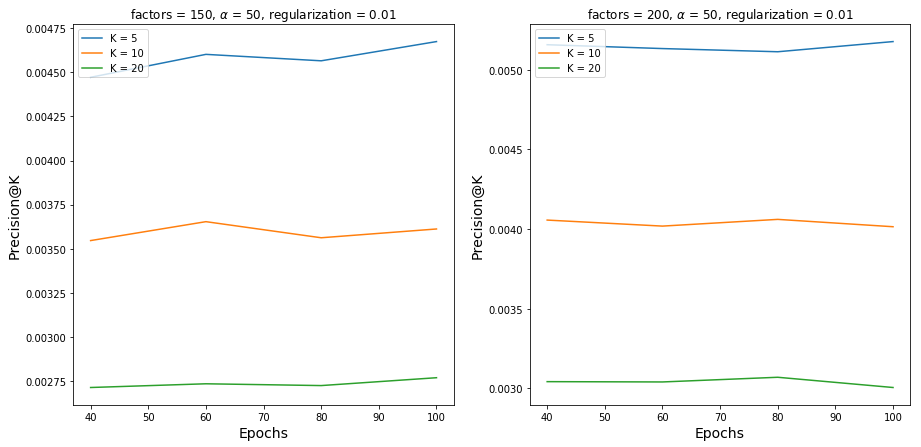

In [9]:
plt.figure(figsize=(15, 7))

# plt.subplot(131)
# plt.title(r'factors = 100, $\alpha$ = 50, regularization = 0.01')
# plt.xlabel('Epochs', fontsize=14)
# plt.ylabel('Precision@K', fontsize=14)
# plt.plot(epochs_diff_values, epochs_5_precisions_rank_100)
# plt.plot(epochs_diff_values, epochs_10_precisions_rank_100)
# plt.plot(epochs_diff_values, epochs_20_precisions_rank_100)
# plt.legend(['K = 5', 'K = 10', 'K = 20'], loc='upper left')

plt.subplot(121)
plt.title(r'factors = 150, $\alpha$ = 50, regularization = 0.01')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Precision@K', fontsize=14)
plt.plot(epochs_diff_values, epochs_5_precisions_rank_150)
plt.plot(epochs_diff_values, epochs_10_precisions_rank_150)
plt.plot(epochs_diff_values, epochs_20_precisions_rank_150)
plt.legend(['K = 5', 'K = 10', 'K = 20'], loc='upper left')

plt.subplot(122)
plt.title(r'factors = 200, $\alpha$ = 50, regularization = 0.01')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Precision@K', fontsize=14)
plt.plot(epochs_diff_values, epochs_5_precisions_rank_200)
plt.plot(epochs_diff_values, epochs_10_precisions_rank_200)
plt.plot(epochs_diff_values, epochs_20_precisions_rank_200)
plt.legend(['K = 5', 'K = 10', 'K = 20'], loc='upper left')

plt.show()

In [10]:
factors_diff_scores_epochs_40 = scores_4.iloc[
    scores_4.index.get_level_values('model').isin(['ALS_rank-100_regularization-0.01_alpha-50_num_epochs-40',
                                                   'ALS_rank-150_regularization-0.01_alpha-50_num_epochs-40',
                                                   'ALS_rank-200_regularization-0.01_alpha-50_num_epochs-40'])
].xs('precision', level='metric', axis=1).unstack('model')

factors_5_precisions_epochs_40 = factors_diff_scores_epochs_40.iloc[factors_diff_scores_epochs_40.index.get_level_values('top-n') == 5].values.flatten()
factors_10_precisions_epochs_40 = factors_diff_scores_epochs_40.iloc[factors_diff_scores_epochs_40.index.get_level_values('top-n') == 10].values.flatten()
factors_20_precisions_epochs_40 = factors_diff_scores_epochs_40.iloc[factors_diff_scores_epochs_40.index.get_level_values('top-n') == 20].values.flatten()

factors_diff_scores_epochs_60 = scores_4.iloc[
    scores_4.index.get_level_values('model').isin(['ALS_rank-100_regularization-0.01_alpha-50_num_epochs-60',
                                                   'ALS_rank-150_regularization-0.01_alpha-50_num_epochs-60',
                                                   'ALS_rank-200_regularization-0.01_alpha-50_num_epochs-60'])
].xs('precision', level='metric', axis=1).unstack('model')

factors_5_precisions_epochs_60 = factors_diff_scores_epochs_60.iloc[factors_diff_scores_epochs_60.index.get_level_values('top-n') == 5].values.flatten()
factors_10_precisions_epochs_60 = factors_diff_scores_epochs_60.iloc[factors_diff_scores_epochs_60.index.get_level_values('top-n') == 10].values.flatten()
factors_20_precisions_epochs_60 = factors_diff_scores_epochs_60.iloc[factors_diff_scores_epochs_60.index.get_level_values('top-n') == 20].values.flatten()

factors_diff_scores_epochs_80 = scores_4.iloc[
    scores_4.index.get_level_values('model').isin(['ALS_rank-100_regularization-0.01_alpha-50_num_epochs-80',
                                                   'ALS_rank-150_regularization-0.01_alpha-50_num_epochs-80',
                                                   'ALS_rank-200_regularization-0.01_alpha-50_num_epochs-80'])
].xs('precision', level='metric', axis=1).unstack('model')

factors_5_precisions_epochs_80 = factors_diff_scores_epochs_80.iloc[factors_diff_scores_epochs_80.index.get_level_values('top-n') == 5].values.flatten()
factors_10_precisions_epochs_80 = factors_diff_scores_epochs_80.iloc[factors_diff_scores_epochs_80.index.get_level_values('top-n') == 10].values.flatten()
factors_20_precisions_epochs_80 = factors_diff_scores_epochs_80.iloc[factors_diff_scores_epochs_80.index.get_level_values('top-n') == 20].values.flatten()

factors_diff_values = [100, 150, 200]

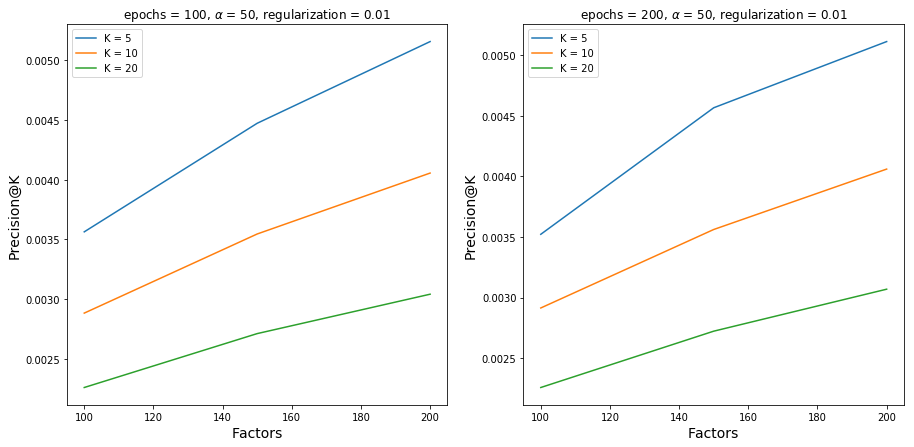

In [11]:
plt.figure(figsize=(15, 7))

plt.subplot(121)
plt.title(r'epochs = 100, $\alpha$ = 50, regularization = 0.01')
plt.xlabel('Factors', fontsize=14)
plt.ylabel('Precision@K', fontsize=14)
plt.plot(factors_diff_values, factors_5_precisions_epochs_40)
plt.plot(factors_diff_values, factors_10_precisions_epochs_40)
plt.plot(factors_diff_values, factors_20_precisions_epochs_40)
plt.legend(['K = 5', 'K = 10', 'K = 20'], loc='upper left')

# plt.subplot(132)
# plt.title(r'epochs = 150, $\alpha$ = 50, regularization = 0.01')
# plt.xlabel('Factors', fontsize=14)
# plt.ylabel('Precision@K', fontsize=14)
# plt.plot(factors_diff_values, factors_5_precisions_epochs_60)
# plt.plot(factors_diff_values, factors_10_precisions_epochs_60)
# plt.plot(factors_diff_values, factors_20_precisions_epochs_60)
# plt.legend(['K = 5', 'K = 10', 'K = 20'], loc='upper left')

plt.subplot(122)
plt.title(r'epochs = 200, $\alpha$ = 50, regularization = 0.01')
plt.xlabel('Factors', fontsize=14)
plt.ylabel('Precision@K', fontsize=14)
plt.plot(factors_diff_values, factors_5_precisions_epochs_80)
plt.plot(factors_diff_values, factors_10_precisions_epochs_80)
plt.plot(factors_diff_values, factors_20_precisions_epochs_80)
plt.legend(['K = 5', 'K = 10', 'K = 20'], loc='upper left')

plt.show()

Exploring results on high number of latent fators and different number of epochs:

In [33]:
precisions_5 = scores_5.xs('precision', level='metric', axis=1).unstack('model')
precisions_5

type                                                 relevance  \
model ALS_rank-200_regularization-0.01_alpha-50_num_epochs-100   
top-n                                                            
5                                               0.005226         
10                                              0.004077         
20                                              0.003038         

type                                                           \
model ALS_rank-200_regularization-0.01_alpha-50_num_epochs-20   
top-n                                                           
5                                               0.004979        
10                                              0.003894        
20                                              0.002842        

type                                                           \
model ALS_rank-200_regularization-0.01_alpha-50_num_epochs-50   
top-n                                                           
5                                               0.005129        
10                                              0.004070        
20                                              0.003030        

type                                                            \
model ALS_rank-250_regularization-0.01_alpha-50_num_epochs-100   
top-n                                                            
5                                               0.005600         
10                                              0.004388         
20                                              0.003260         

type                                                           \
model ALS_rank-250_regularization-0.01_alpha-50_num_epochs-20   
top-n                                                           
5                                               0.005453        
10                                              0.004173        
20                                              0.003056        

type                                                                     \
model ALS_rank-250_regularization-0.01_alpha-50_num_epochs-50       BPR   
top-n                                                                     
5                                               0.005563       0.000496   
10                                              0.004370       0.000439   
20                                              0.003262       0.000386   

type                                 
model        MP   PureSVD       RND  
top-n                                
5      0.001156  0.001158  0.000017  
10     0.000841  0.000883  0.000017  
20     0.000909  0.000648  0.000015

In [34]:
epochs_diff_scores_rank_200 = scores_5.iloc[
    scores_5.index.get_level_values('model').isin(['ALS_rank-200_regularization-0.01_alpha-50_num_epochs-20',
                                                   'ALS_rank-200_regularization-0.01_alpha-50_num_epochs-50',
                                                   'ALS_rank-200_regularization-0.01_alpha-50_num_epochs-100'])
].xs('precision', level='metric', axis=1).unstack('model')

epochs_5_precisions_rank_200 = epochs_diff_scores_rank_200.iloc[epochs_diff_scores_rank_200.index.get_level_values('top-n') == 5].values.flatten()
epochs_10_precisions_rank_200 = epochs_diff_scores_rank_200.iloc[epochs_diff_scores_rank_200.index.get_level_values('top-n') == 10].values.flatten()
epochs_20_precisions_rank_200 = epochs_diff_scores_rank_200.iloc[epochs_diff_scores_rank_200.index.get_level_values('top-n') == 20].values.flatten()

epochs_diff_scores_rank_250 = scores_5.iloc[
    scores_5.index.get_level_values('model').isin(['ALS_rank-250_regularization-0.01_alpha-50_num_epochs-20',
                                                   'ALS_rank-250_regularization-0.01_alpha-50_num_epochs-50',
                                                   'ALS_rank-250_regularization-0.01_alpha-50_num_epochs-100',])
].xs('precision', level='metric', axis=1).unstack('model')

epochs_5_precisions_rank_250 = epochs_diff_scores_rank_250.iloc[epochs_diff_scores_rank_250.index.get_level_values('top-n') == 5].values.flatten()
epochs_10_precisions_rank_250 = epochs_diff_scores_rank_250.iloc[epochs_diff_scores_rank_250.index.get_level_values('top-n') == 10].values.flatten()
epochs_20_precisions_rank_250 = epochs_diff_scores_rank_250.iloc[epochs_diff_scores_rank_250.index.get_level_values('top-n') == 20].values.flatten()

epochs_diff_values = [20, 50, 100]

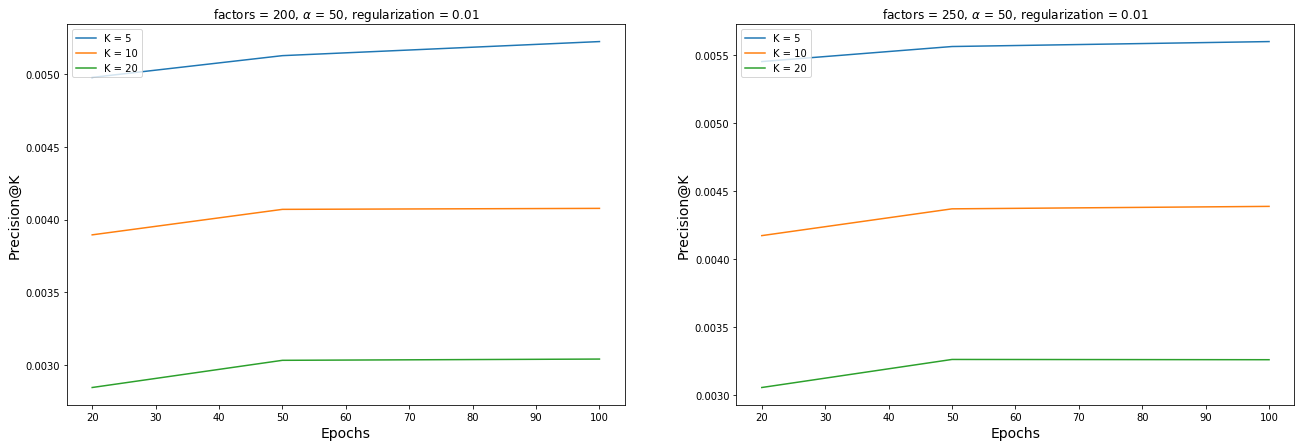

In [35]:
plt.figure(figsize=(22, 7))

plt.subplot(121)
plt.title(r'factors = 200, $\alpha$ = 50, regularization = 0.01')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Precision@K', fontsize=14)
plt.plot(epochs_diff_values, epochs_5_precisions_rank_200)
plt.plot(epochs_diff_values, epochs_10_precisions_rank_200)
plt.plot(epochs_diff_values, epochs_20_precisions_rank_200)
plt.legend(['K = 5', 'K = 10', 'K = 20'], loc='upper left')

plt.subplot(122)
plt.title(r'factors = 250, $\alpha$ = 50, regularization = 0.01')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Precision@K', fontsize=14)
plt.plot(epochs_diff_values, epochs_5_precisions_rank_250)
plt.plot(epochs_diff_values, epochs_10_precisions_rank_250)
plt.plot(epochs_diff_values, epochs_20_precisions_rank_250)
plt.legend(['K = 5', 'K = 10', 'K = 20'], loc='upper left')

plt.show()

Note: BPR (factors=200) doesn't seem to be a competitive baseline.